# Modeling Variables of non-interest
Before we set up our path model, we need to account for head size, sex, and scanner sequence.


In [28]:
library(gdata)
library(ggplot2)
setwd('/home/camachocm2/Analysis/aggregate_anats/results/')
data <- read.csv('/home/camachocm2/Analysis/aggregate_anats/results/combined_data_k2_20180710.csv')
print(colnames(data))
#complete_data <-data [which(data$totPutamen>0 & data$totPallidum>0 & data$totCaudate>0 & data$totAccumbens.area>0),]
complete_data <-data [which(data$totPutamen>0 & data$totPallidum>0),]

 [1] "X"                           "freesurferID"               
 [3] "eTIV"                        "Left.Caudate"               
 [5] "Left.Putamen"                "Left.Pallidum"              
 [7] "Left.Accumbens.area"         "Left.Thalamus.Proper"       
 [9] "Right.Caudate"               "Right.Putamen"              
[11] "Right.Pallidum"              "Right.Accumbens.area"       
[13] "Right.Thalamus.Proper"       "activity_level"             
[15] "anger_frustration"           "attention_focusing"         
[17] "discomfort"                  "soothability"               
[19] "fear"                        "high_intensity_pleasure"    
[21] "impulsivity"                 "inhibitory_control"         
[23] "low_intensity_pleasure"      "perceptual_sensitivity"     
[25] "sadness"                     "shyness"                    
[27] "activity_level_std"          "anger_frustration_std"      
[29] "attention_focusing_std"      "discomfort_std"             
[31] "soothability_std"  

In [43]:
lmodel <- lm(totPutamen_std ~ eTIV + male+ Study + Age_yrs, data=complete_data)
complete_data$res_putamen <- resid(lmodel)
lmodel <- lm(totPallidum_std ~ 1 + eTIV + male+ Study + Age_yrs, data=complete_data)
complete_data$res_pall <- resid(lmodel)
#lmodel <- lm(totCaudate_std ~ 1 + eTIV  + male+ Sequence.Version, data=complete_data)
#complete_data$res_caud <- resid(lmodel)
#lmodel <- lm(totAccumbens.area_std ~ 1 + eTIV + male+ Sequence.Version, data=complete_data)
#complete_data$res_nacc <- resid(lmodel)

## Modeling Variables of interest

In [46]:
full_model <- manova(cbind(res_putamen, res_pall) ~ kmgroup + Age_yrs*kmgroup, data=complete_data)
summary(full_model)
summary.aov(full_model)

                 Df   Pillai approx F num Df den Df Pr(>F)
kmgroup           1 0.041161  2.29665      2    107 0.1055
Age_yrs           1 0.001194  0.06397      2    107 0.9381
kmgroup:Age_yrs   1 0.031217  1.72392      2    107 0.1833
Residuals       108                                       

 Response res_putamen :
                 Df Sum Sq Mean Sq F value  Pr(>F)  
kmgroup           1  0.973 0.97331  1.8483 0.17681  
Age_yrs           1  0.027 0.02711  0.0515 0.82093  
kmgroup:Age_yrs   1  1.598 1.59842  3.0354 0.08431 .
Residuals       108 56.872 0.52659                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response res_pall :
                 Df Sum Sq Mean Sq F value  Pr(>F)  
kmgroup           1  1.796 1.79649  4.3737 0.03884 *
Age_yrs           1  0.050 0.05004  0.1218 0.72774  
kmgroup:Age_yrs   1  0.009 0.00857  0.0209 0.88539  
Residuals       108 44.361 0.41075                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


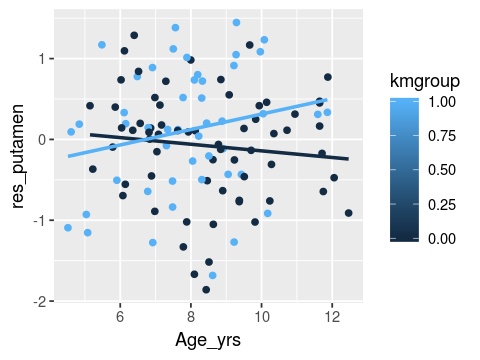

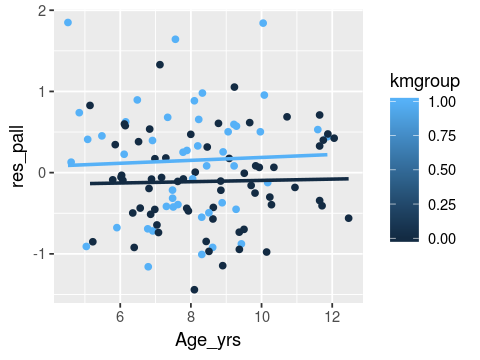

In [45]:
options(repr.plot.width=4, repr.plot.height=3)
p <- ggplot(data=complete_data, aes(x=Age_yrs, y=res_putamen, group=kmgroup, color=kmgroup)) + geom_point() + geom_smooth(method=lm,se=FALSE)
show(p)

p <- ggplot(data=complete_data, aes(x=Age_yrs, y=res_pall, group=kmgroup, color=kmgroup)) + geom_point() + geom_smooth(method=lm,se=FALSE)
show(p)

In [ ]:
full_model <- manova(cbind(res_putamen, res_pall, res_caud, res_nacc) ~ Age_yrs + Dx_Group + Age_yrs*Dx_Group, data=complete_data)
summary(full_model)
summary.aov(full_model)

In [ ]:
options(repr.plot.width=4, repr.plot.height=3)
p <- ggplot(data=complete_data, aes(x=Age_yrs, y=res_putamen, group=Dx_Group, color=Dx_Group)) + geom_point() + geom_smooth(method=lm,se=FALSE)
show(p)

p <- ggplot(data=complete_data, aes(x=Age_yrs, y=res_pall, group=Dx_Group, color=Dx_Group)) + geom_point() + geom_smooth(method=lm,se=FALSE)
show(p)

In [47]:
full_model <- manova(cbind(internalizing, externalizing) ~ Age_yrs + kmgroup + res_pall + res_putamen + kmgroup*res_putamen + kmgroup*res_pall, data=complete_data)
summary(full_model)
summary.aov(full_model)

                     Df  Pillai approx F num Df den Df    Pr(>F)    
Age_yrs               1 0.07453    4.187      2    104   0.01782 *  
kmgroup               1 0.38735   32.877      2    104 8.612e-12 ***
res_pall              1 0.05856    3.234      2    104   0.04338 *  
res_putamen           1 0.02251    1.198      2    104   0.30603    
kmgroup:res_putamen   1 0.00050    0.026      2    104   0.97441    
kmgroup:res_pall      1 0.08353    4.740      2    104   0.01072 *  
Residuals           105                                             
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response internalizing :
                     Df  Sum Sq Mean Sq F value    Pr(>F)    
Age_yrs               1  1811.9  1811.9  7.1550 0.0086727 ** 
kmgroup               1  4013.1  4013.1 15.8471 0.0001267 ***
res_pall              1   270.9   270.9  1.0699 0.3033403    
res_putamen           1    64.8    64.8  0.2559 0.6140199    
kmgroup:res_putamen   1     9.1     9.1  0.0359 0.8500968    
kmgroup:res_pall      1   432.7   432.7  1.7088 0.1939984    
Residuals           105 26590.0   253.2                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response externalizing :
                     Df  Sum Sq Mean Sq F value    Pr(>F)    
Age_yrs               1  1963.8  1963.8  8.4007  0.004567 ** 
kmgroup               1 10902.9 10902.9 46.6393 5.721e-10 ***
res_pall              1     6.8     6.8  0.0291  0.864961    
res_putamen           1    13.0    13.0  0.0556  0.814113    
kmgroup:res_putamen   1     2.7     2.7  0.0117  0.914127    
kmgroup:res_

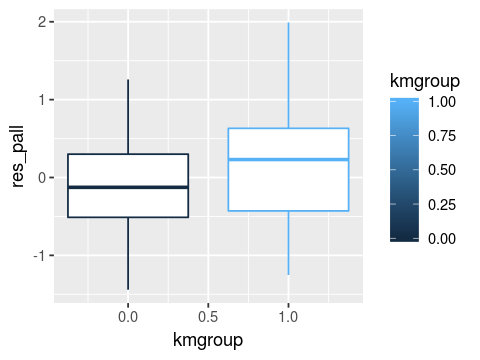

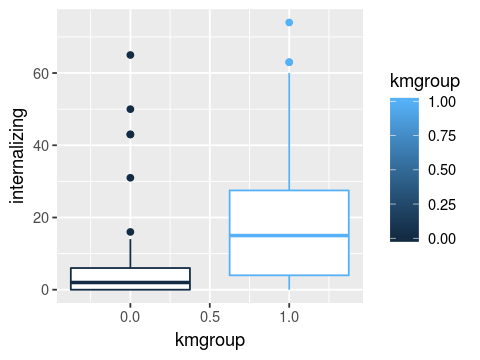

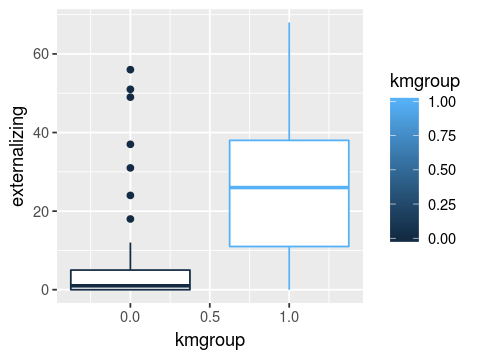

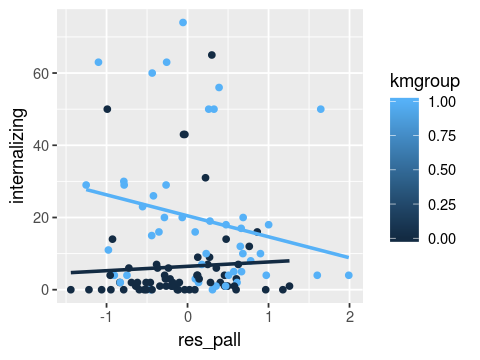

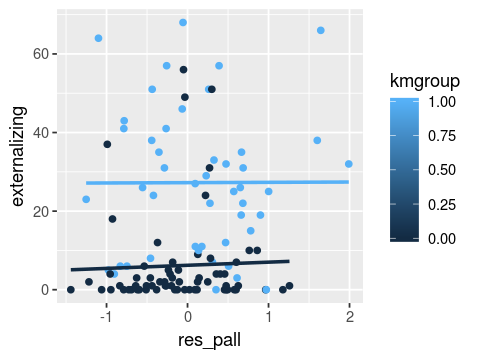

In [33]:
p <- ggplot(data=complete_data, aes(x=kmgroup, y=res_pall, group=kmgroup, color=kmgroup)) + geom_boxplot()
show(p)
p <- ggplot(data=complete_data, aes(x=kmgroup, y=internalizing, group=kmgroup, color=kmgroup)) + geom_boxplot()
show(p)
p <- ggplot(data=complete_data, aes(x=kmgroup, y=externalizing, group=kmgroup, color=kmgroup)) + geom_boxplot()
show(p)
p <- ggplot(data=complete_data, aes(x=res_pall, y=internalizing, group=kmgroup, color=kmgroup)) + geom_point() + geom_smooth(method=lm,se=FALSE)
show(p)
p <- ggplot(data=complete_data, aes(x=res_pall, y=externalizing, group=kmgroup, color=kmgroup)) + geom_point() + geom_smooth(method=lm,se=FALSE)
show(p)

In [ ]:
full_model <- manova(cbind(internalizing, externalizing) ~ Age_yrs + Dx_Group + res_putamen + res_pall + Dx_Group*res_putamen + Dx_Group*res_pall, data=complete_data)
summary(full_model)
summary.aov(full_model)

In [ ]:
p <- ggplot(data=complete_data, aes(x=res_pall, y=internalizing_std, group=Dx_Group, color=Dx_Group)) + geom_point() + geom_smooth(method=lm,se=FALSE)
show(p)

# Structural Equation Modeling

1.00000000,0.43890247,-0.01902246,0.12106475,0.1971581
0.43890247,1.00000000,0.04667402,0.05895198,0.1279304
-0.01902246,0.04667402,1.00000000,0.87957209,0.3814300
0.12106475,0.05895198,0.87957209,1.00000000,0.5699778
0.19715813,0.12793041,0.38143001,0.56997784,1.0000000


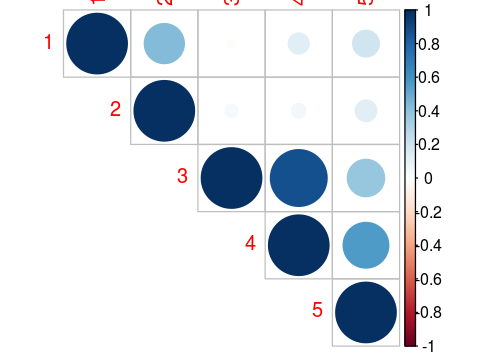

In [51]:
library(corrplot)
cor_res<-cor(cbind(complete_data$res_pall,complete_data$res_putamen,complete_data$internalizing,
                   complete_data$externalizing,complete_data$kmgroup), use='complete.obs')
cor_res
corrplot(cor_res, type='upper')

In [54]:
library(lavaan)

model <- 'internalizing_std ~ c*res_pall
        
          kmgroup ~ a*res_pall
          internalizing_std ~ b*kmgroup
         
          ab:=a*b
          total := c + (a*b)
          '
fit <- sem(model, data=complete_data)
summary(fit)
coef(fit)

lavaan (0.6-1) converged normally after  18 iterations

  Number of observations                           112

  Estimator                                         ML
  Model Fit Test Statistic                       0.000
  Degrees of freedom                                 0

Parameter Estimates:

  Information                                 Expected
  Information saturated (h1) model          Structured
  Standard Errors                             Standard

Regressions:
                      Estimate  Std.Err  z-value  P(>|z|)
  internalizing_std ~                                    
    res_pall   (c)      -0.154    0.139   -1.106    0.269
  kmgroup ~                                              
    res_pall   (a)       0.151    0.071    2.128    0.033
  internalizing_std ~                                    
    kmgroup    (b)       0.821    0.181    4.523    0.000

Variances:
                   Estimate  Std.Err  z-value  P(>|z|)
   .internlzng_std    0.863    0.115    7.483   

c                                    a 
                              -0.154                                0.151 
                                   b internalizing_std~~internalizing_std 
                               0.821                                0.863 
                    kmgroup~~kmgroup 
                               0.234